In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('Housing.csv')

In [4]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
x = data['price'].values.reshape(-1, 1)

In [12]:
x

array([[13300000],
       [12250000],
       [12250000],
       [12215000],
       [11410000],
       [10850000],
       [10150000],
       [10150000],
       [ 9870000],
       [ 9800000],
       [ 9800000],
       [ 9681000],
       [ 9310000],
       [ 9240000],
       [ 9240000],
       [ 9100000],
       [ 9100000],
       [ 8960000],
       [ 8890000],
       [ 8855000],
       [ 8750000],
       [ 8680000],
       [ 8645000],
       [ 8645000],
       [ 8575000],
       [ 8540000],
       [ 8463000],
       [ 8400000],
       [ 8400000],
       [ 8400000],
       [ 8400000],
       [ 8400000],
       [ 8295000],
       [ 8190000],
       [ 8120000],
       [ 8080940],
       [ 8043000],
       [ 7980000],
       [ 7962500],
       [ 7910000],
       [ 7875000],
       [ 7840000],
       [ 7700000],
       [ 7700000],
       [ 7560000],
       [ 7560000],
       [ 7525000],
       [ 7490000],
       [ 7455000],
       [ 7420000],
       [ 7420000],
       [ 7420000],
       [ 735

In [13]:
y = data['area'].values.reshape(-1, 1)

In [14]:
y

array([[ 7420],
       [ 8960],
       [ 9960],
       [ 7500],
       [ 7420],
       [ 7500],
       [ 8580],
       [16200],
       [ 8100],
       [ 5750],
       [13200],
       [ 6000],
       [ 6550],
       [ 3500],
       [ 7800],
       [ 6000],
       [ 6600],
       [ 8500],
       [ 4600],
       [ 6420],
       [ 4320],
       [ 7155],
       [ 8050],
       [ 4560],
       [ 8800],
       [ 6540],
       [ 6000],
       [ 8875],
       [ 7950],
       [ 5500],
       [ 7475],
       [ 7000],
       [ 4880],
       [ 5960],
       [ 6840],
       [ 7000],
       [ 7482],
       [ 9000],
       [ 6000],
       [ 6000],
       [ 6550],
       [ 6360],
       [ 6480],
       [ 6000],
       [ 6000],
       [ 6000],
       [ 6000],
       [ 6600],
       [ 4300],
       [ 7440],
       [ 7440],
       [ 6325],
       [ 6000],
       [ 5150],
       [ 6000],
       [ 6000],
       [11440],
       [ 9000],
       [ 7680],
       [ 6000],
       [ 6000],
       [ 8880],
       [

In [15]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size= 0.2, random_state = 42)

In [16]:
x_train, x_test, y_train, y_test 

(array([[ 7525000],
        [ 6300000],
        [ 3920000],
        [ 3430000],
        [ 3010000],
        [ 4620000],
        [ 1750000],
        [ 3010000],
        [ 2520000],
        [ 3710000],
        [ 3703000],
        [ 2450000],
        [ 4200000],
        [ 3640000],
        [ 3640000],
        [ 5383000],
        [ 1767150],
        [ 5250000],
        [ 3500000],
        [ 6790000],
        [ 3920000],
        [ 3920000],
        [ 5810000],
        [ 5250000],
        [ 5950000],
        [ 3500000],
        [ 2408000],
        [ 2660000],
        [ 5285000],
        [ 3675000],
        [ 4200000],
        [ 2275000],
        [ 3570000],
        [ 4620000],
        [ 4200000],
        [ 3087000],
        [ 3255000],
        [ 8855000],
        [ 3640000],
        [ 7343000],
        [ 4690000],
        [ 4305000],
        [ 3640000],
        [ 4403000],
        [ 4270000],
        [ 2940000],
        [ 4795000],
        [ 8540000],
        [ 4235000],
        [ 7700000],


In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred

array([[ 4721.38981103],
       [ 6455.01263661],
       [ 4487.11645622],
       [ 6314.44862372],
       [ 3878.00573372],
       [ 5283.64586257],
       [ 5517.91921738],
       [ 5044.68704066],
       [ 3643.73237892],
       [ 4248.15763432],
       [ 8797.74618468],
       [ 3784.2963918 ],
       [ 4252.84310141],
       [ 4252.84310141],
       [ 3526.59570151],
       [ 3784.2963918 ],
       [ 3784.2963918 ],
       [ 6923.55934622],
       [ 3971.71507565],
       [ 3924.86040468],
       [ 6501.86730757],
       [ 5635.05589478],
       [ 3268.89501122],
       [ 5517.91921738],
       [ 4810.41368586],
       [10203.38631353],
       [ 4065.42441757],
       [ 5424.20987545],
       [ 8563.47282987],
       [ 3690.58704988],
       [ 6548.72197853],
       [ 4346.55244334],
       [ 6455.01263661],
       [ 3971.71507565],
       [ 4229.41576593],
       [ 4815.09915295],
       [ 5283.64586257],
       [ 4205.98843045],
       [ 4346.55244334],
       [ 3596.87770795],


In [20]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error:{rmse}")

Root Mean Squared Error:1713.2203959486733


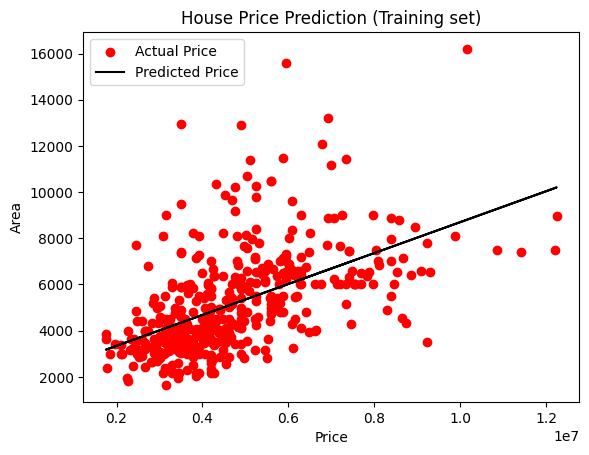

In [21]:
plt.scatter(x_train, y_train, color = 'red', label = 'Actual Price')
plt.plot(x_train, model.predict(x_train), color = 'black', label = 'Predicted Price')
plt.title('House Price Prediction (Training set)')
plt.xlabel('Price')
plt.ylabel('Area')
plt.legend()
plt.show()

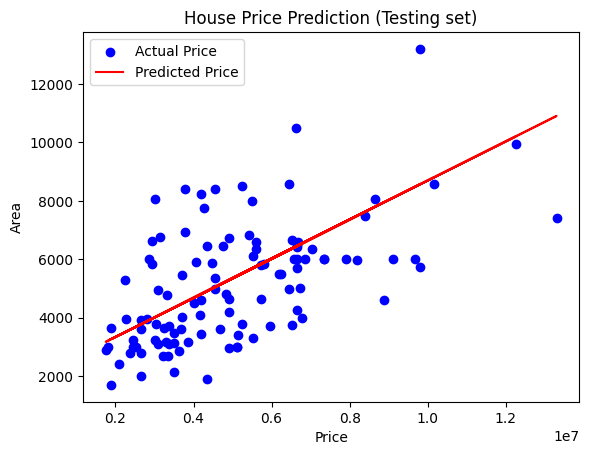

In [22]:
plt.scatter(x_test, y_test, color = 'blue', label = 'Actual Price')
plt.plot(x_test, model.predict(x_test), color = 'red', label = 'Predicted Price')
plt.title('House Price Prediction (Testing set)')
plt.xlabel('Price')
plt.ylabel('Area')
plt.legend()
plt.show()